In [1]:
# Import Statements
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## 1. Visualizing data

In [2]:
import pandas as pd
df=pd.read_csv("datos_df_bt.csv")
print(df.head())

   Index  Body Temp
0      1     26.285
1      2     26.285
2      3     26.270
3      4     26.260
4      5     26.245


In [3]:
df

,Index,Body Temp
0,1,26.285
1,2,26.285
2,3,26.270
3,4,26.260
4,5,26.245
...,...,...
195,196,31.076
196,197,34.315
197,198,32.831
198,199,31.581


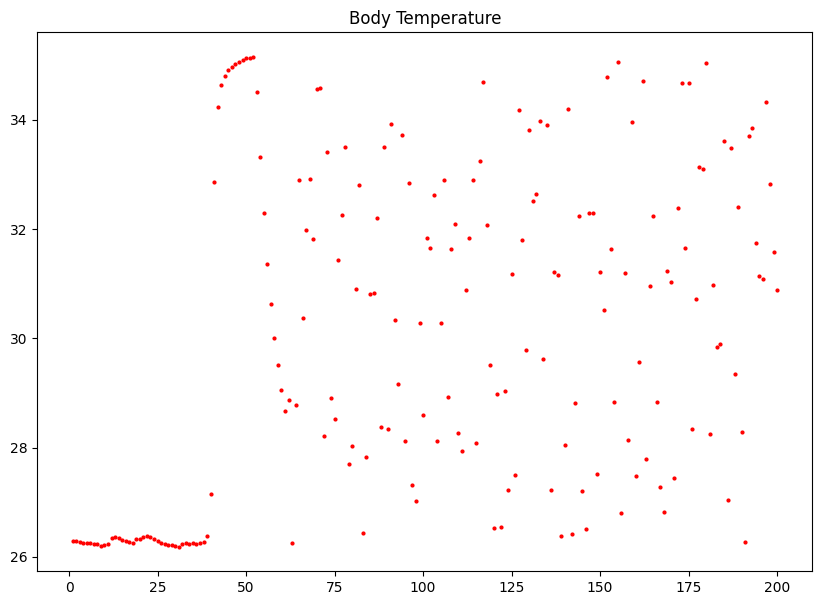

In [4]:
# Visualize temp information on plot scatters
plt.figure(figsize=(10,7))
# Plot temperature data
plt.scatter(df['Index'], df['Body Temp'], c='r', s=4, label="Temperature")
# Plot title
plt.title("Body Temperature")
# Show the plot
plt.show()

## 2. Preparing data

In [5]:
# Convert temperature and pressure to arrays
X_numpy = df['Body Temp'].to_numpy()

X_numpy

array([26.285, 26.285, 26.27 , 26.26 , 26.245, 26.245, 26.24 , 26.23 ,
       26.195, 26.225, 26.24 , 26.345, 26.37 , 26.34 , 26.3  , 26.285,
       26.27 , 26.26 , 26.33 , 26.335, 26.36 , 26.375, 26.355, 26.32 ,
       26.285, 26.26 , 26.23 , 26.225, 26.21 , 26.205, 26.185, 26.24 ,
       26.25 , 26.24 , 26.255, 26.24 , 26.25 , 26.275, 26.375, 27.145,
       32.865, 34.23 , 34.63 , 34.805, 34.9  , 34.965, 35.015, 35.05 ,
       35.09 , 35.12 , 35.13 , 35.15 , 34.505, 33.315, 32.285, 31.36 ,
       30.62 , 30.01 , 29.505, 29.045, 28.67 , 28.878, 26.263, 28.775,
       32.892, 30.379, 31.978, 32.907, 31.819, 34.569, 34.58 , 28.21 ,
       33.406, 28.906, 28.526, 31.43 , 32.262, 33.507, 27.697, 28.022,
       30.906, 32.813, 26.428, 27.829, 30.814, 30.835, 32.208, 28.374,
       33.497, 28.344, 33.929, 30.34 , 29.157, 33.726, 28.127, 32.833,
       27.323, 27.028, 30.283, 28.603, 31.841, 31.65 , 32.616, 28.126,
       30.273, 32.887, 28.923, 31.633, 32.097, 28.271, 27.938, 30.877,
      

In [6]:
# Shuffle data
np.random.shuffle(X_numpy)

X_numpy

array([26.245, 33.249, 31.581, 34.669, 33.315, 30.835, 28.837, 26.26 ,
       33.48 , 32.262, 26.335, 30.283, 26.24 , 29.354, 26.285, 27.938,
       26.37 , 32.4  , 26.255, 26.25 , 29.157, 26.26 , 31.227, 26.285,
       28.67 , 34.173, 28.126, 32.903, 26.245, 34.9  , 28.98 , 34.569,
       33.726, 32.376, 30.892, 26.24 , 35.15 , 26.285, 30.01 , 34.505,
       29.622, 35.09 , 31.978, 32.907, 31.214, 32.887, 29.899, 33.61 ,
       32.285, 33.101, 32.242, 26.33 , 26.818, 26.417, 33.507, 26.375,
       26.263, 28.821, 32.616, 28.775, 30.906, 26.24 , 34.776, 35.015,
       26.272, 31.43 , 26.225, 28.906, 35.05 , 31.206, 33.855, 31.631,
       31.8  , 30.273, 27.438, 28.127, 33.13 , 28.056, 27.323, 26.23 ,
       33.957, 26.377, 26.285, 27.048, 28.526, 26.185, 30.814, 33.707,
       27.028, 28.244, 35.041, 26.808, 30.972, 34.63 , 30.379, 33.803,
       29.045, 34.805, 26.21 , 32.069, 26.25 , 34.58 , 32.64 , 28.603,
       26.27 , 27.23 , 30.526, 28.21 , 26.518, 32.208, 28.271, 35.12 ,
      

In [7]:
# Convert temperature to torch data bc of datatype
X_numpy.dtype

dtype('float64')

In [8]:
X_tensor = torch.from_numpy(X_numpy)

X_tensor

tensor([26.2450, 33.2490, 31.5810, 34.6690, 33.3150, 30.8350, 28.8370, 26.2600,
        33.4800, 32.2620, 26.3350, 30.2830, 26.2400, 29.3540, 26.2850, 27.9380,
        26.3700, 32.4000, 26.2550, 26.2500, 29.1570, 26.2600, 31.2270, 26.2850,
        28.6700, 34.1730, 28.1260, 32.9030, 26.2450, 34.9000, 28.9800, 34.5690,
        33.7260, 32.3760, 30.8920, 26.2400, 35.1500, 26.2850, 30.0100, 34.5050,
        29.6220, 35.0900, 31.9780, 32.9070, 31.2140, 32.8870, 29.8990, 33.6100,
        32.2850, 33.1010, 32.2420, 26.3300, 26.8180, 26.4170, 33.5070, 26.3750,
        26.2630, 28.8210, 32.6160, 28.7750, 30.9060, 26.2400, 34.7760, 35.0150,
        26.2720, 31.4300, 26.2250, 28.9060, 35.0500, 31.2060, 33.8550, 31.6310,
        31.8000, 30.2730, 27.4380, 28.1270, 33.1300, 28.0560, 27.3230, 26.2300,
        33.9570, 26.3770, 26.2850, 27.0480, 28.5260, 26.1850, 30.8140, 33.7070,
        27.0280, 28.2440, 35.0410, 26.8080, 30.9720, 34.6300, 30.3790, 33.8030,
        29.0450, 34.8050, 26.2100, 32.06

In [9]:
# We need to work with 32float tensors
X = X_tensor.type(torch.float32)

X.dtype

torch.float32

### 2.1 Creating baselines

In [10]:
# Create known parameters
weight = 0.8
bias = 0.2

# Create model with formula
start = 0
end = 1
step = 0.02
y = weight * X + bias
print(X[:10], y[:10])

tensor([26.2450, 33.2490, 31.5810, 34.6690, 33.3150, 30.8350, 28.8370, 26.2600,
        33.4800, 32.2620]) tensor([21.1960, 26.7992, 25.4648, 27.9352, 26.8520, 24.8680, 23.2696, 21.2080,
        26.9840, 26.0096])


In [11]:
len(X), len(y)

(200, 200)

In [12]:
# Create a train/test split for linear regression
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

### 2.2 Visualizing the train and test data

In [13]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None,
                     title="str"):
  """ Plots training data, test data and compares predictions """
  plt.figure(figsize=(10, 7))

  # Plot title
  plt.title(f"{title}")

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  # Check if there are predicitions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={"size": 14});

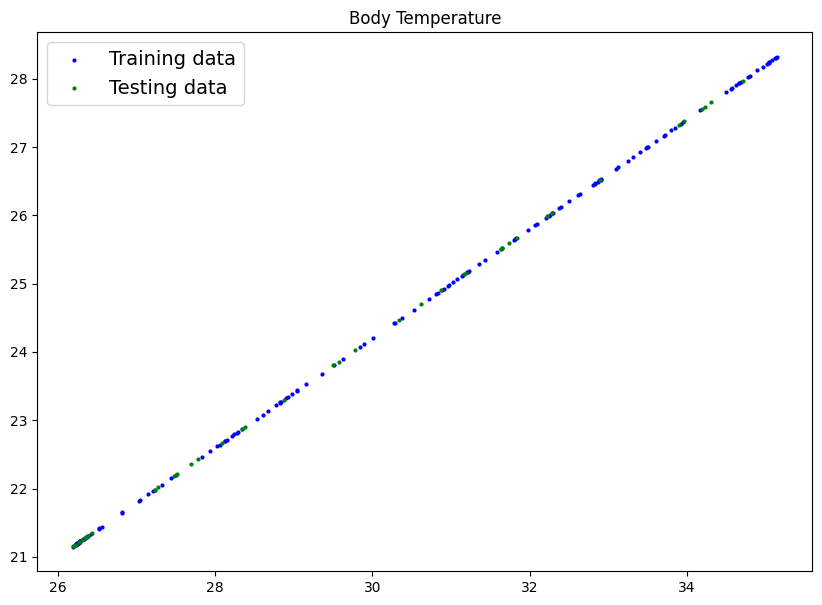

In [14]:
# For temperature
plot_predictions(X_train, y_train, X_test, y_test, title="Body Temperature")

## 3. Build a model

In [15]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [16]:
 # Create a random seed
 torch.manual_seed(42)

 # Create an instance of the model (this is a subclass of nn.Module)
 model_0 = LinearRegressionModel()

 # Check out the parameters
 list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
# Look out what does parameters above refer to
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [18]:
# Check model device
next(model_0.parameters()).device

device(type='cpu')

In [19]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


In [20]:
# Set model to GPU if available
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
X_test

tensor([29.5050, 34.3150, 27.6970, 26.2250, 30.6200, 32.2280, 33.9020, 31.6500,
        27.5130, 31.8410, 32.8920, 31.6330, 34.2300, 26.1950, 33.9670, 28.3740,
        31.1850, 32.2900, 30.8770, 28.3440, 28.0870, 26.3000, 34.1970, 29.5710,
        27.2280, 26.3600, 30.3400, 26.2050, 26.3400, 31.7410, 27.7840, 26.2700,
        29.7820, 27.2720, 34.7150, 26.3750, 28.8780, 27.4720, 31.1710, 26.4280])

## 4. Train model

Go from a poor representation of the data to a better representation, which leads to less loss and more accuracy

In [22]:
# Check model_0 parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
             ('bias', tensor([0.1288], device='cuda:0'))])

In [23]:
# Set up a loss functions
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### 4.1 Building a training loop
0. Loop through data
1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimize zero grad
4. Loss backward - move backwards though the network to calculate the gradients of each of the parameters of our model with respect to the loss (backpropagation)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)

In [24]:
# Put data on available device
# If not, error will happen
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [25]:
X_train.shape

torch.Size([160])

In [26]:
# Make pre-preds
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels: \n{y_test[:10]}")

Lenght of predictions: 40, Shape: torch.Size([40])
Lenght of test samples: 40, Shape: torch.Size([40])

First 10 predictions: 
tensor([10.0629, 11.6823,  9.4541,  8.9585, 10.4383, 10.9797, 11.5433, 10.7851,
         9.3922, 10.8494], device='cuda:0')

First 10 labels: 
tensor([23.8040, 27.6520, 22.3576, 21.1800, 24.6960, 25.9824, 27.3216, 25.5200,
        22.2104, 25.6728], device='cuda:0')


In [27]:
# Building a training loop for temperature
torch.manual_seed(42)
# Define epochs
epochs = 1000

# Training
# 0. Loop through the data
for epoch in range(epochs):
  # Training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  # Testing mode
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_0(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

    # Print model state dict (we'll visualize adjusted parameters)
    print(model_0.state_dict())

Epoch: 0 | Train Loss: 14.0296 | Test loss: 4.8736
OrderedDict([('weights', tensor([0.6380], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 100 | Train Loss: 4.1438 | Test loss: 4.8736
OrderedDict([('weights', tensor([0.6380], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 200 | Train Loss: 4.1438 | Test loss: 4.8736
OrderedDict([('weights', tensor([0.6380], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 300 | Train Loss: 4.1438 | Test loss: 4.8736
OrderedDict([('weights', tensor([0.6380], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 400 | Train Loss: 4.1438 | Test loss: 4.8736
OrderedDict([('weights', tensor([0.6380], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 500 | Train Loss: 4.1438 | Test loss: 4.8736
OrderedDict([('weights', tensor([0.6380], device='cuda:0')), ('bias', tensor([0.1388], device='cuda:0'))])
Epoch: 600 | Train Loss: 4.1438 | Test loss: 4.

In [28]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.9392], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.1488], device='cuda:0', requires_grad=True)]